In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import KFold
import lightgbm as ltb
import xgboost as xgb
from sklearn import linear_model
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [2]:
data = pd.read_csv("./data/insurance.csv")
df = pd.DataFrame(data)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.describe(include="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [6]:
df.shape

(1338, 7)

In [7]:
df.duplicated().sum()

1

In [8]:
df_dup = df[df.duplicated()]
df_dup

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
df.drop(index=[581], inplace=True) #중복된 데이터 삭제

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current f

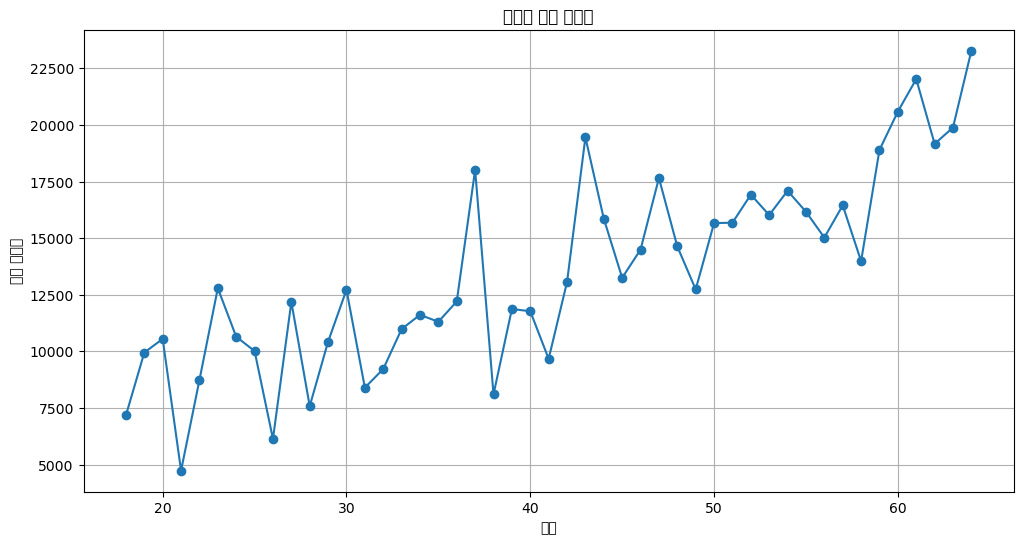

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current f

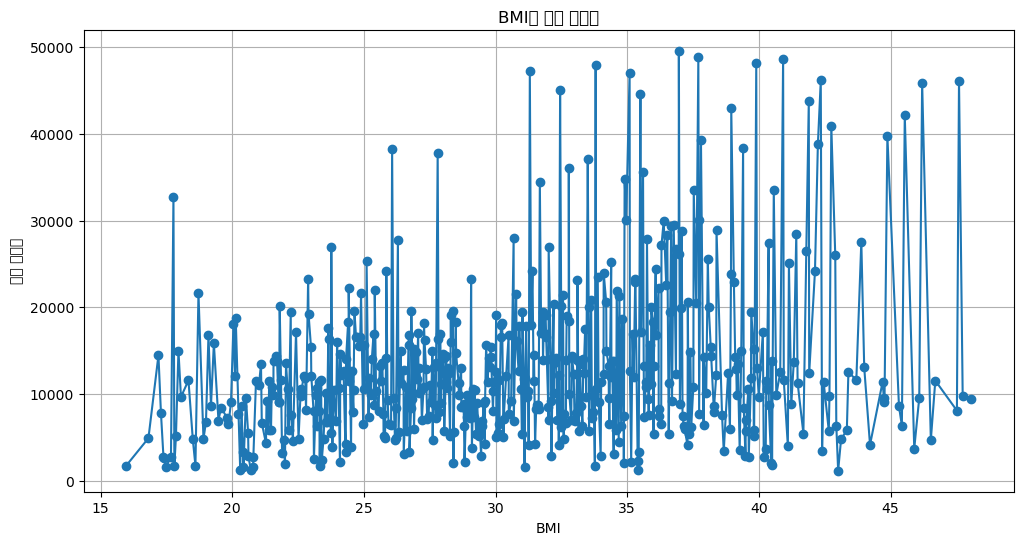

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current f

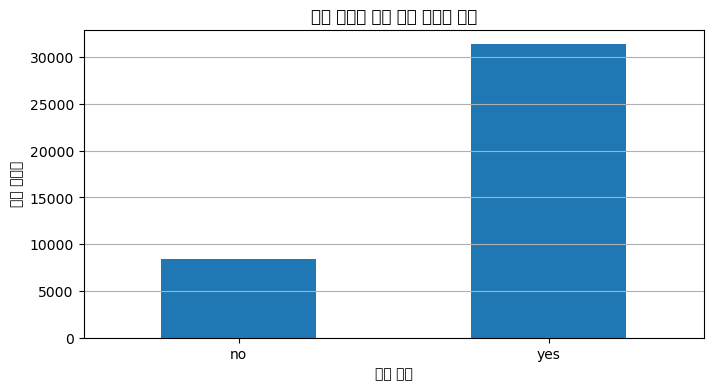

In [45]:
# 나이별 평균 의료비 계산
age_mean_charges = df.groupby('age')['charges'].mean()
plt.figure(figsize=(12, 6))
plt.plot(age_mean_charges.index, age_mean_charges.values, marker='o')
plt.title('나이별 평균 의료비')
plt.xlabel('나이')
plt.ylabel('평균 의료비')
plt.grid(True)
plt.show()

# BMI별 평균 의료비 계산
bmi_mean_charges = df.groupby('bmi')['charges'].mean()
plt.figure(figsize=(12, 6))
plt.plot(bmi_mean_charges.index, bmi_mean_charges.values, marker='o')
plt.title('BMI별 평균 의료비')
plt.xlabel('BMI')
plt.ylabel('평균 의료비')
plt.grid(True)
plt.show()

# 흡연자와 비흡연자의 평균 의료비 비교
smoker_mean_charges = df.groupby('smoker')['charges'].mean()
plt.figure(figsize=(8, 4))
smoker_mean_charges.plot(kind='bar', rot=0)
plt.title('흡연 여부에 따른 평균 의료비 비교')
plt.xlabel('흡연 여부')
plt.ylabel('평균 의료비')
plt.grid(axis='y')
plt.show()


## Outlier (이상치 탐지)

In [15]:
features = ['age', 'bmi', 'children', 'charges']

In [16]:
# Standard Deviation 사용
index_list = []

for f in features :
    mean = df[f].mean()
    std = df[f].std()
    cutoff = std*3
    
    index = df[(df[f] < mean-cutoff) | (df[f] > mean+cutoff)].index
    index_list.extend(index)

In [17]:
index_list = sorted(set(index_list))
print("outliers counts : ", len(index_list))
print("outlier indexes  : ", index_list)

outliers counts :  29
outlier indexes  :  [32, 34, 71, 116, 166, 413, 425, 438, 543, 568, 577, 640, 819, 847, 877, 932, 937, 969, 984, 1047, 1085, 1116, 1130, 1146, 1230, 1245, 1272, 1300, 1317]


In [18]:
df.drop(index_list, inplace=True)

In [19]:
# Interquartile Range 사용
index_list = []

for f in features :
    Q1 = np.percentile(df[f], 25)
    Q3 = np.percentile(df[f], 75)
    
    IQR = Q3 - Q1
    
    index = df[(df[f] < Q1-1.5*IQR) | (df[f] > Q3+1.5*IQR)].index
    index_list.extend(index)

In [20]:
index_list = sorted(set(index_list))
print("outliers counts : ", len(index_list))
print("outlier indexes  : ", index_list)

outliers counts :  136
outlier indexes  :  [14, 19, 23, 29, 30, 38, 39, 49, 53, 55, 82, 84, 86, 94, 109, 123, 146, 158, 161, 175, 185, 203, 223, 240, 242, 251, 252, 254, 256, 263, 265, 271, 281, 286, 288, 292, 298, 312, 314, 322, 327, 328, 330, 338, 373, 377, 381, 401, 420, 421, 422, 441, 476, 488, 500, 524, 530, 549, 558, 569, 587, 609, 615, 618, 621, 623, 629, 665, 667, 668, 674, 677, 682, 689, 697, 706, 725, 736, 738, 739, 742, 759, 803, 826, 828, 842, 845, 850, 852, 856, 860, 883, 893, 901, 917, 947, 951, 953, 956, 958, 1001, 1012, 1021, 1022, 1031, 1036, 1037, 1049, 1062, 1070, 1078, 1088, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1152, 1156, 1186, 1206, 1207, 1218, 1240, 1241, 1249, 1284, 1288, 1291, 1301, 1303, 1313, 1323]


## scatter plot과 boxplot

In [21]:
# Numerical Features (수치형 특성)
numerical_features = ['age', 'bmi', 'charges']

In [22]:
# Categorical Features (범주형 특성)
categorical_features = ["sex", "children", "smoker", "region"]

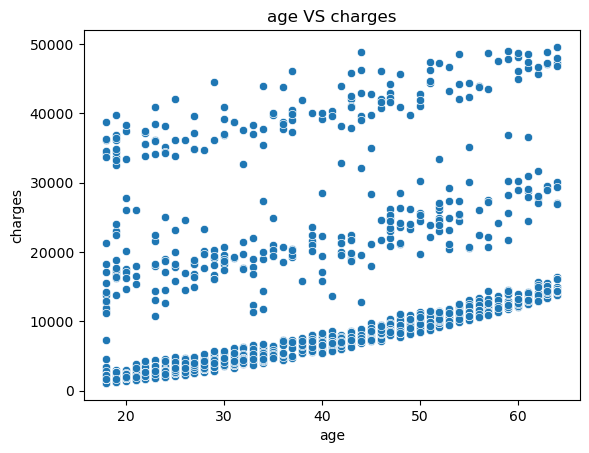

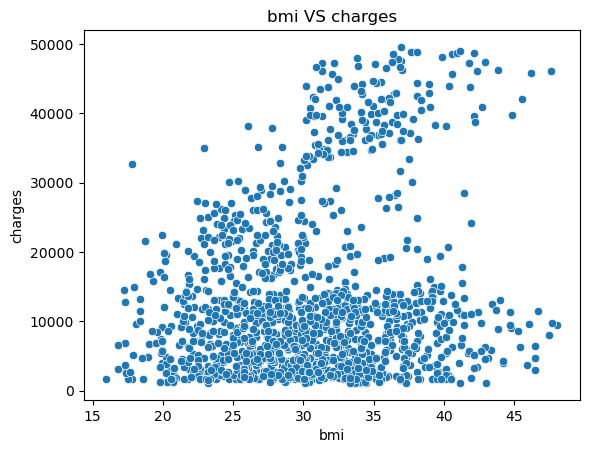

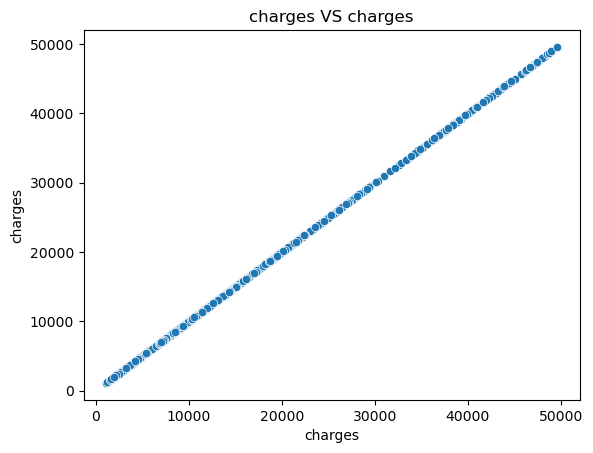

In [23]:
for n in numerical_features:
    sns.scatterplot(x=n, y="charges", data=df)
    plt.title(f"{n} VS charges")
    plt.xlabel(f"{n}")
    plt.ylabel("charges")
    plt.show()


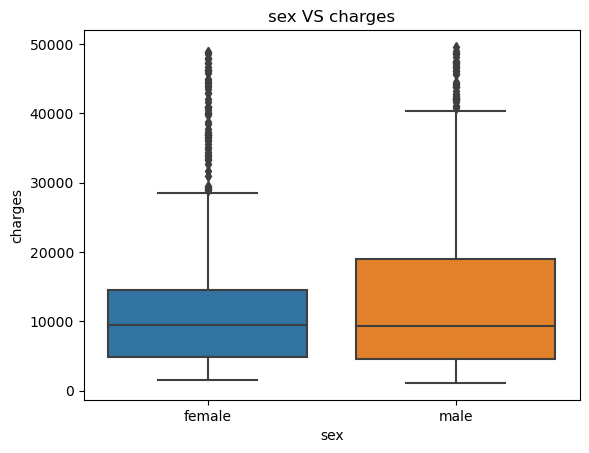

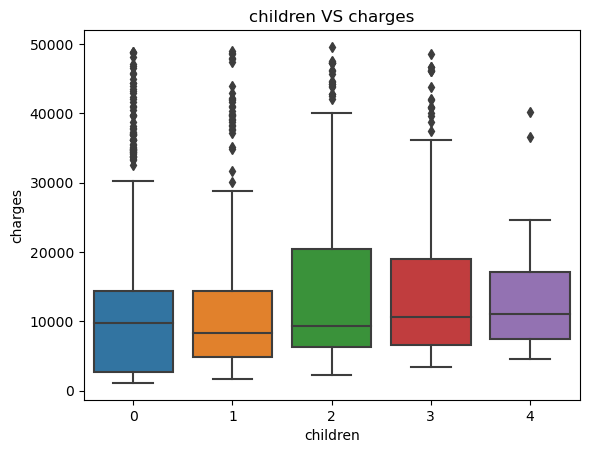

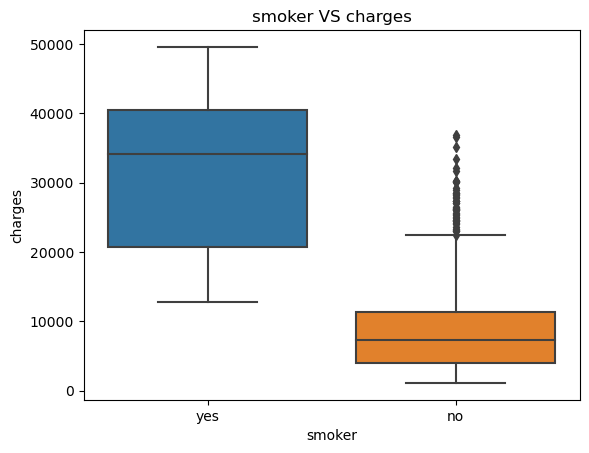

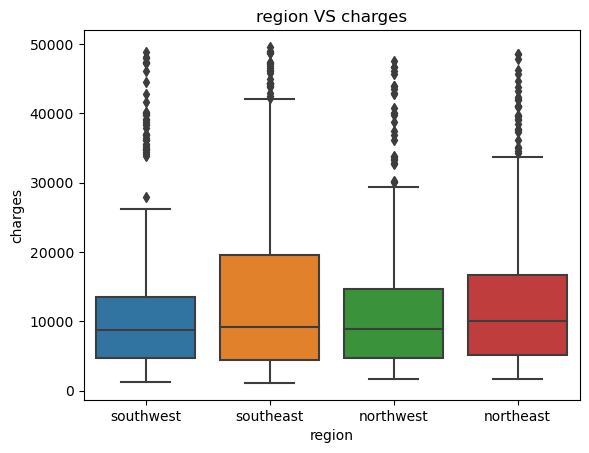

In [24]:
for n in categorical_features:
    sns.boxplot(x=n, y="charges", data=df)
    plt.title(f"{n} VS charges")
    plt.show()


## 간단한 시각화

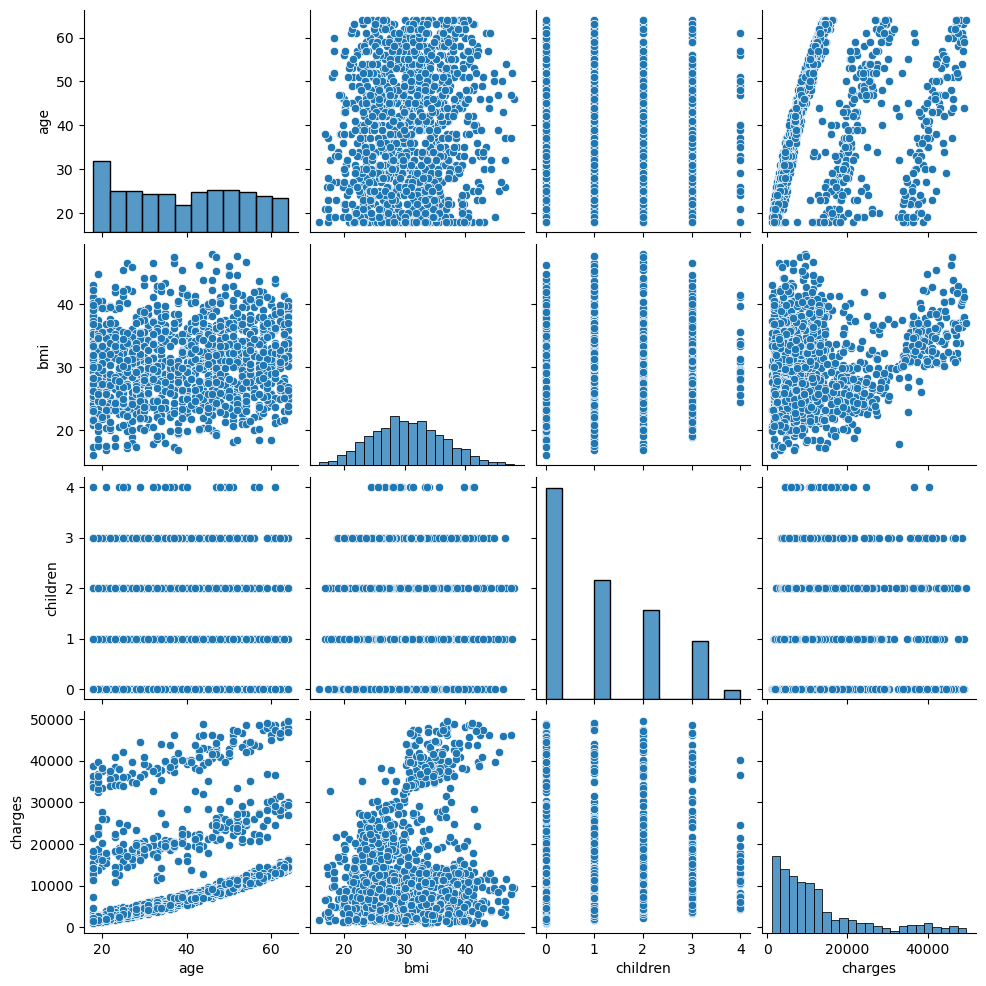

In [25]:
sns.pairplot(df)

C:\Users\user\AppData\Local\Temp\ipykernel_34244\3447627673.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


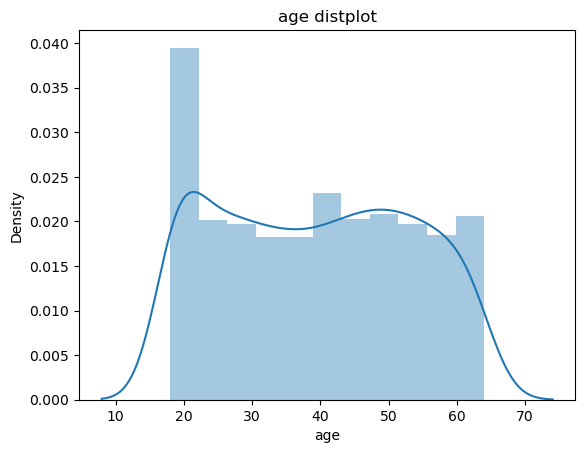

In [26]:
# age열의 분포
sns.distplot(df['age'])
plt.title("age distplot")
plt.show()

- 대부분의 데이터가 20세 근처에 분포하고 있다

C:\Users\user\AppData\Local\Temp\ipykernel_34244\1850927103.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


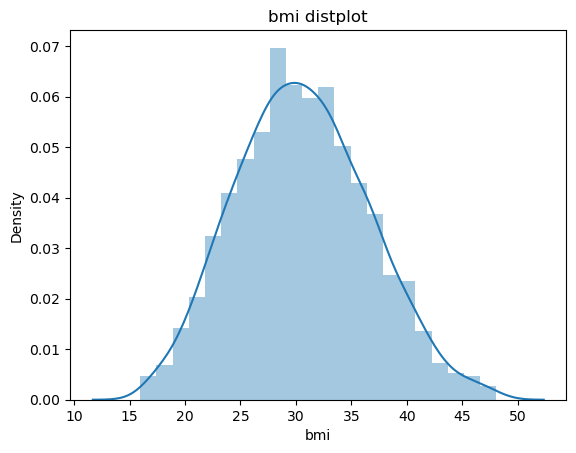

In [27]:
# bmi열의 분포
sns.distplot(df['bmi'])
plt.title("bmi distplot")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_34244\3313111563.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


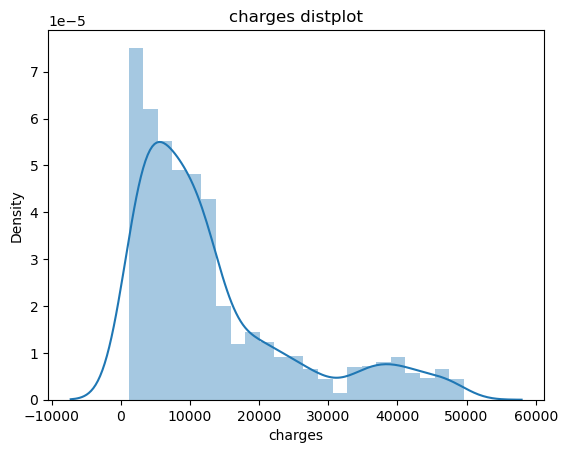

In [28]:
# charges열의 분포
sns.distplot(df['charges'])
plt.title("charges distplot")
plt.show()

- 높은 비용을 지불한 경우가 상대적으로 적고, 낮은 비용을 지불한 경우가 많다
(right skewed)

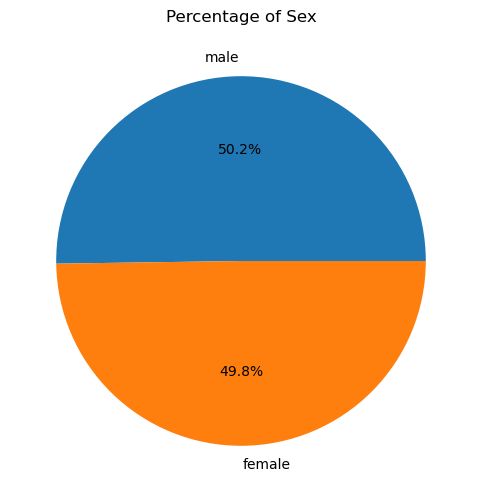

In [29]:
s_sex = df['sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(s_sex, labels=s_sex.index, autopct='%1.1f%%')
plt.title('Percentage of Sex')
plt.show()

- 남성 클라이언트의 수가 여성 클라이언트보다 많다

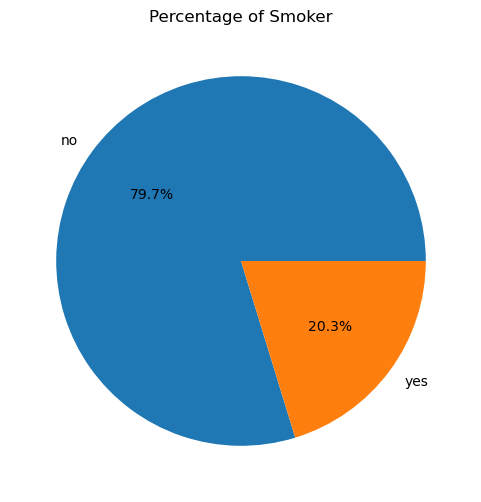

In [30]:
s_smoker = df['smoker'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(s_smoker, labels=s_smoker.index, autopct='%1.1f%%')
plt.title('Percentage of Smoker')
plt.show()

- 비흡연자의 비율이 더 많다

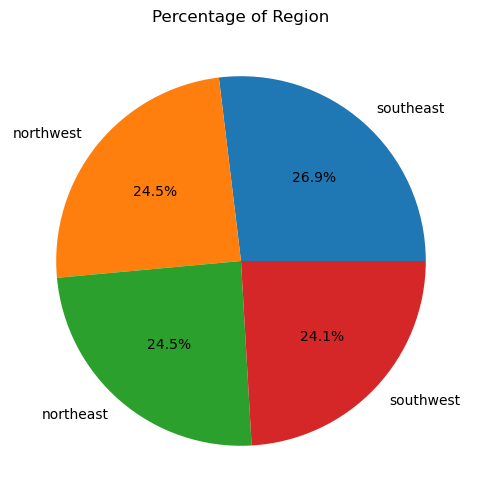

In [31]:
s_region = df['region'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(s_region, labels=s_region.index, autopct='%1.1f%%')
plt.title('Percentage of Region')
plt.show()

- 남동 지역을 제외한 나머지 지역은 비슷한 비율이다

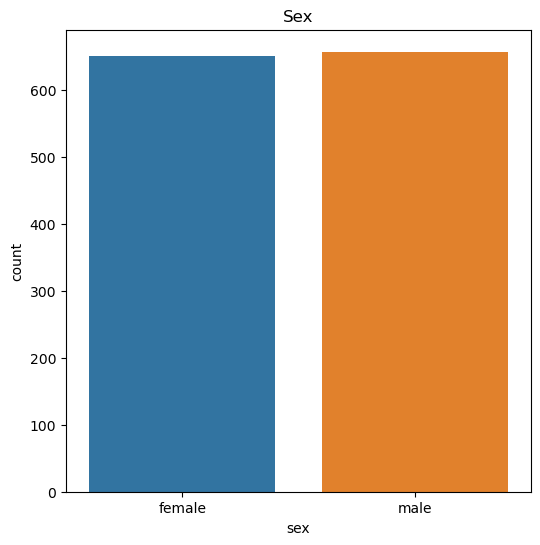

In [32]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='sex')
plt.title('Sex')
plt.show()

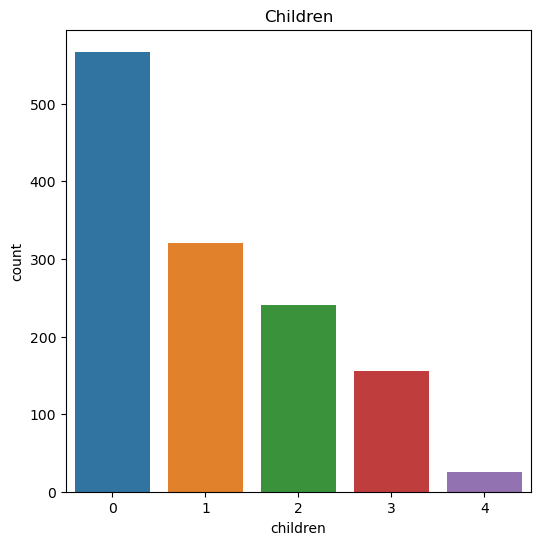

In [33]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='children')
plt.title('Children')
plt.show()

- 대부분의 사람들이 아이가 없다

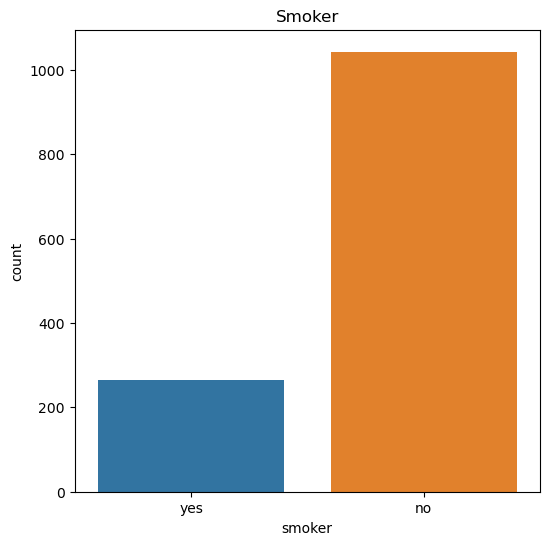

In [34]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='smoker')
plt.title('Smoker')
plt.show()

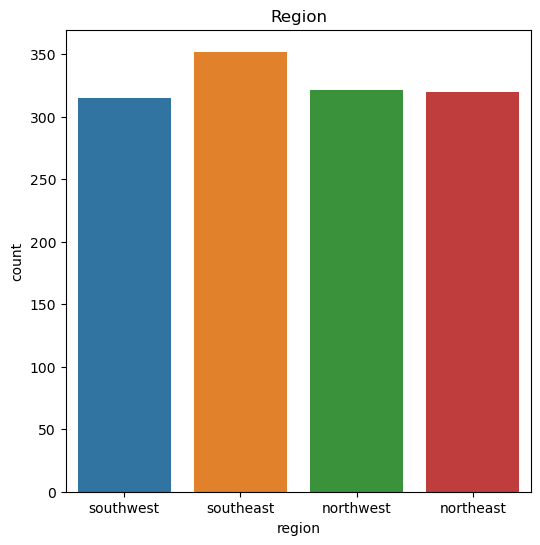

In [35]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='region')
plt.title('Region')
plt.show()

## Categorical Features 인코딩

In [36]:
categoricals = ['sex', 'smoker', 'region']

In [37]:
# get_dummies를 이용하여 범주형 데이터를 수치형 데이터로 변환
# 0과 1로 나타냄
df1 = pd.get_dummies(df, columns=categoricals, drop_first=True)
df1

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current f

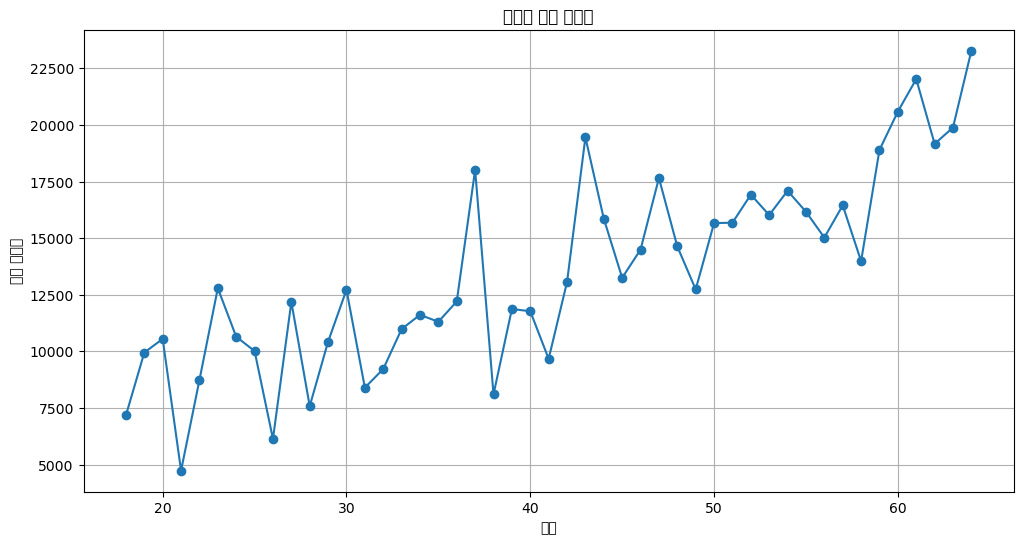

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current f

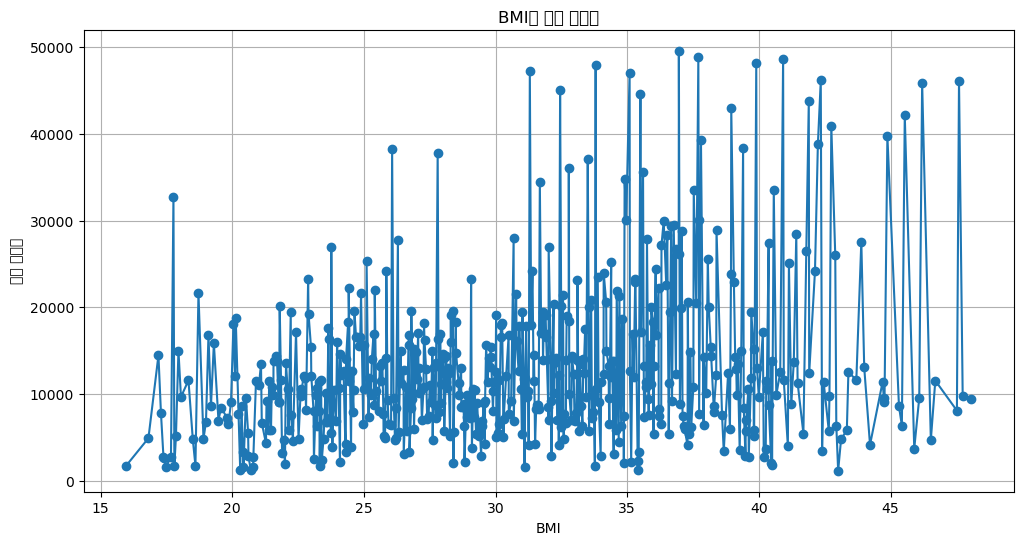

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current f

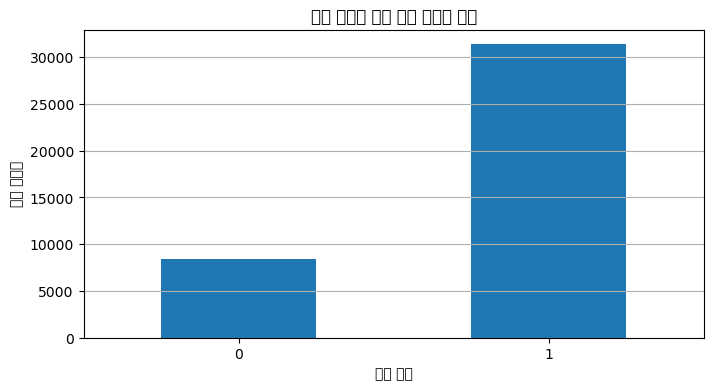

In [47]:
# 나이별 평균 의료비 계산
age_mean_charges = df1.groupby('age')['charges'].mean()
plt.figure(figsize=(12, 6))
plt.plot(age_mean_charges.index, age_mean_charges.values, marker='o')
plt.title('나이별 평균 의료비')
plt.xlabel('나이')
plt.ylabel('평균 의료비')
plt.grid(True)
plt.show()

# BMI별 평균 의료비 계산
bmi_mean_charges = df1.groupby('bmi')['charges'].mean()
plt.figure(figsize=(12, 6))
plt.plot(bmi_mean_charges.index, bmi_mean_charges.values, marker='o')
plt.title('BMI별 평균 의료비')
plt.xlabel('BMI')
plt.ylabel('평균 의료비')
plt.grid(True)
plt.show()

# 흡연자와 비흡연자의 평균 의료비 비교
smoker_mean_charges = df1.groupby('smoker_yes')['charges'].mean()
plt.figure(figsize=(8, 4))
smoker_mean_charges.plot(kind='bar', rot=0)
plt.title('흡연 여부에 따른 평균 의료비 비교')
plt.xlabel('흡연 여부')
plt.ylabel('평균 의료비')
plt.grid(axis='y')
plt.show()

## 상관관계

<AxesSubplot: >

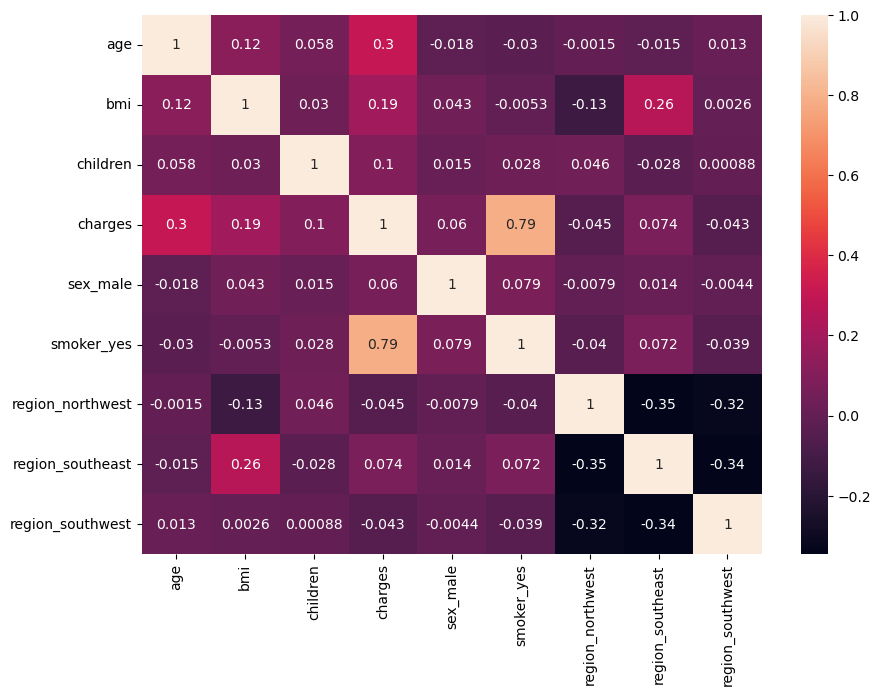

In [39]:
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(), annot=True)

- 각 지역이 다른 지역들과 어느 정도 상관관계를 가지고 있다
- 'charges'와 'smoker_yes' 열이 강한 상관관계를 가진다

In [40]:
df1 = df1.sort_values(by='charges')

# 경계 설정
boundary1 = 14000
boundary2 = 30000

df_low = df1[df1['charges'] <= boundary1]
df_mid = df1[(df1['charges'] > boundary1) & (df1['charges'] <= boundary2)]
df_high = df1[df1['charges'] > boundary2]

## Low는 Linear Regression

- 데이터량이 많고 선형

In [48]:
y = df_low['charges']
X = df_low.drop(['charges'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.3, random_state = 13)

In [49]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

stand_scaler = StandardScaler()
stand_scaler.fit(X_train)
X_train = stand_scaler.transform(X_train)
X_test = stand_scaler.transform(X_test)

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [51]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("Train 데이터 성능:")
print('RMSE: %.2f' % rmse_train)
print('MAPE: %.2f' % mape_train)

print("\nTest 데이터 성능:")
print('RMSE: %.2f' % rmse_test)
print('MAPE: %.2f' % mape_test)

rmse_scorer = make_scorer(mean_squared_error, squared=False)
rmse_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring=rmse_scorer)

mape_scorer = make_scorer(mean_absolute_percentage_error)
mape_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring=mape_scorer)

print("\n교차 검증 결과:")
print("RMSE scores:", rmse_scores)
print("Average RMSE: %.2f" % np.mean(rmse_scores))

print("\nMAPE scores:", mape_scores)
print("Average MAPE: %.2f" % np.mean(mape_scores))

Train 데이터 성능:
RMSE: 899.72
MAPE: 9.63

Test 데이터 성능:
RMSE: 1526.66
MAPE: 10.70

교차 검증 결과:
RMSE scores: [ 527.26053262  871.90110062  543.33533837  908.06361902 1431.38386318]
Average RMSE: 856.39

MAPE scores: [ 9.58442837  9.8802385   9.94264128  9.63537043 10.00934199]
Average MAPE: 9.81


## Mid는 XGBoost, LightGBM

- 데이터가 상대적으로 적지만 패턴이 복잡

In [52]:
y = df_mid['charges']
X = df_mid.drop(['charges'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.3, random_state = 13)

In [53]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

stand_scaler = StandardScaler()
stand_scaler.fit(X_train)
X_train = stand_scaler.transform(X_train)
X_test = stand_scaler.transform(X_test)

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

xgbr = xgb.XGBRegressor(random_state = 13) 

xgbr.fit(X_train, y_train)

y_pred_train_xgbr = xgbr.predict(X_train)
y_pred_test_xgbr = xgbr.predict(X_test)

In [55]:
rmse_train_xgbr = np.sqrt(mean_squared_error(y_train, y_pred_train_xgbr))
rmse_test_xgbr = np.sqrt(mean_squared_error(y_test, y_pred_test_xgbr))

mape_train_xgbr = mean_absolute_percentage_error(y_train, y_pred_train_xgbr)
mape_test_xgbr = mean_absolute_percentage_error(y_test, y_pred_test_xgbr)


print("XGBoost Regressor 모델의 성능:")
print("Train 데이터 성능:")
print('RMSE: %.2f' % rmse_train_xgbr)
print('MAPE: %.2f' % mape_train_xgbr)

print("\nTest 데이터 성능:")
print('RMSE: %.2f' % rmse_test_xgbr)
print('MAPE: %.2f' % mape_test_xgbr)

rmse_scorer = make_scorer(mean_squared_error, squared=False)
rmse_scores = cross_val_score(xgbr, X_train, y_train, cv=5, scoring=rmse_scorer)

mape_scorer = make_scorer(mean_absolute_percentage_error)
mape_scores = cross_val_score(xgbr, X_train, y_train, cv=5, scoring=mape_scorer)

print("\n교차 검증 결과:")
print("RMSE scores:", rmse_scores)
print("Average RMSE: %.2f" % np.mean(rmse_scores))

print("\nMAPE scores:", mape_scores)
print("Average MAPE: %.2f" % np.mean(mape_scores))

XGBoost Regressor 모델의 성능:
Train 데이터 성능:
RMSE: 4.95
MAPE: 0.02

Test 데이터 성능:
RMSE: 3499.21
MAPE: 10.67

교차 검증 결과:
RMSE scores: [4028.44675588 3235.15221735 4341.2114492  3034.48717647 3461.80996647]
Average RMSE: 3620.22

MAPE scores: [13.0705089   9.40162678 15.96249079 11.06992429 12.86116487]
Average MAPE: 12.47


In [56]:
lgbm = ltb.LGBMRegressor()
lgbm.fit(X_train, y_train)

y_pred_train_lgbm = lgbm.predict(X_train)
y_pred_test_lgbm = lgbm.predict(X_test)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 106
[LightGBM] [Info] Number of data points in the train set: 158, number of used features: 8
[LightGBM] [Info] Start training from score 20170.074070
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [57]:
rmse_train_lgbm = np.sqrt(mean_squared_error(y_train, y_pred_train_lgbm))
rmse_test_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_test_lgbm))

mape_train_lgbm = mean_absolute_percentage_error(y_train, y_pred_train_lgbm)
mape_test_lgbm = mean_absolute_percentage_error(y_test, y_pred_test_lgbm)

print("LightGBM Regressor 모델의 성능:")
print("Train 데이터 성능:")
print('RMSE: %.2f' % rmse_train_lgbm)
print('MAPE: %.2f' % mape_train_lgbm)

print("\nTest 데이터 성능:")
print('RMSE: %.2f' % rmse_test_lgbm)
print('MAPE: %.2f' % mape_test_lgbm)

rmse_scorer = make_scorer(mean_squared_error, squared=False)
rmse_scores_lgbm = cross_val_score(lgbm, X_train, y_train, cv=5, scoring=rmse_scorer)

mape_scorer = make_scorer(mean_absolute_percentage_error)
mape_scores_lgbm = cross_val_score(lgbm, X_train, y_train, cv=5, scoring=mape_scorer)

print("\nLightGBM 모델의 교차 검증 결과:")
print("RMSE scores:", rmse_scores_lgbm)
print("Average RMSE: %.2f" % np.mean(rmse_scores_lgbm))

print("\nMAPE scores:", mape_scores_lgbm)
print("Average MAPE: %.2f" % np.mean(mape_scores_lgbm))

LightGBM Regressor 모델의 성능:
Train 데이터 성능:
RMSE: 2265.58
MAPE: 7.82

Test 데이터 성능:
RMSE: 3601.43
MAPE: 11.99
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 126, number of used features: 8
[LightGBM] [Info] Start training from score 20175.241738
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

## high는 Decision Tree

- 데이터가 적고 높은 구간, 패턴이 복잡

In [58]:
y = df_high['charges']
X = df_high.drop(['charges'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.3, random_state = 13)

In [59]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

stand_scaler = StandardScaler()
stand_scaler.fit(X_train)
X_train = stand_scaler.transform(X_train)
X_test = stand_scaler.transform(X_test)

In [60]:
# Decision Tree (Best parameters)
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': list(range(1, 16)) # max_depth: 1 ~ 15
}

dt_regressor = DecisionTreeRegressor(random_state=13)

grid_search = GridSearchCV(estimator=dt_regressor, param_grid=params, cv=3, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_dt_regressor = grid_search.best_estimator_

y_train_dt = best_dt_regressor.predict(X_train)
y_test_dt = best_dt_regressor.predict(X_test)

rmse_train_dt = np.sqrt(mean_squared_error(y_train, y_train_dt))
rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_test_dt))

mape_train_dt = mean_absolute_percentage_error(y_train, y_train_dt)
mape_test_dt = mean_absolute_percentage_error(y_test, y_test_dt)

print("Decision Tree 모델의 성능:")
print("Train 데이터 성능:")
print('RMSE: %.2f' % rmse_train_dt)
print('MAPE: %.2f' % mape_train_dt)

print("\nTest 데이터 성능:")
print('RMSE: %.2f' % rmse_test_dt)
print('MAPE: %.2f' % mape_test_dt)

print("Best Parameters:", grid_search.best_params_)

Decision Tree 모델의 성능:
Train 데이터 성능:
RMSE: 2.54
MAPE: 0.00

Test 데이터 성능:
RMSE: 2281.89
MAPE: 3.98
Best Parameters: {'max_depth': 12}


In [73]:
# 임의의 하나의 행을 선택
random_row = df1.sample()
selected_index = random_row.index[0]
print(random_row)

      age    bmi  children     charges  sex_male  smoker_yes  \
1337   61  29.07         0  29141.3603         0           1   

      region_northwest  region_southeast  region_southwest  
1337                 1                 0                 0  


## Input을 이용한 데이터 입력 및 예측

In [74]:
def predict_insurance_charges(age, bmi, children, sex_male, smoker_yes, region_northwest, region_southeast, region_southwest):
    if age < 40:
        if bmi < 30:
            if smoker_yes == 1:
                model = best_dt_regressor
            else:
                model = lr  # Linear Regression 비흡연자
        else:
            if smoker_yes == 1:
                model = xgbr
            else:
                model = lr  # Linear Regression 비흡연자
    else:
        if bmi >= 30:  # BMI 30 이상인 경우 high 구간으로 가정
            model = best_dt_regressor
        else:
            model = best_dt_regressor
            
    input_data = pd.DataFrame({
        'age': [age],
        'bmi': [bmi],
        'children': [children],
        'sex_male': [sex_male],
        'smoker_yes': [smoker_yes],
        'region_northwest': [region_northwest],
        'region_southeast': [region_southeast],
        'region_southwest': [region_southwest]
    })

    input_data_scaled = min_max_scaler.transform(input_data)
    input_data_scaled = stand_scaler.transform(input_data_scaled)

    predicted_charge = model.predict(input_data_scaled)

    return predicted_charge[0]

age = int(input("나이를 입력하세요: "))
bmi = float(input("BMI를 입력하세요: "))
children = int(input("자녀 수를 입력하세요: "))
sex_male = int(input("성별을 입력하세요 (남자: 1, 여자: 0): "))
smoker_yes = int(input("흡연 여부를 입력하세요 (흡연자: 1, 비흡연자: 0): "))
region_northwest = int(input("지역을 입력하세요 (북서부: 1, 아닐 경우: 0): "))
region_southeast = int(input("지역을 입력하세요 (남동부: 1, 아닐 경우: 0): "))
region_southwest = int(input("지역을 입력하세요 (남서부: 1, 아닐 경우: 0): "))

predicted_charge = predict_insurance_charges(age, bmi, children, sex_male, smoker_yes, region_northwest, region_southeast, region_southwest)
print("Predicted Medical Charges:", predicted_charge)

Predicted Medical Charges: 30942.1918


## 모델 비교

In [75]:
print("Model\t\t\t\tRMSE\t\tMAPE")
print("="*55)
print("Low - Linear Regression\t\t%.2f\t\t%.2f" % (rmse_test, mape_test))
print("Mid - XGBoost\t\t\t%.2f\t\t%.2f" % (rmse_test_xgbr, mape_test_xgbr))
print("High - Decision Tree\t\t%.2f\t\t%.2f" % (rmse_test_dt, mape_test_dt))

Model				RMSE		MAPE
Low - Linear Regression		1526.66		10.70
Mid - XGBoost			3499.21		10.67
High - Decision Tree		2281.89		3.98
